# First Tutorial

[link](https://towardsdatascience.com/teaching-a-variational-autoencoder-vae-to-draw-mnist-characters-978675c95776)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [ ]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd
def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [ ]:
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


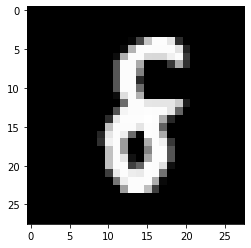

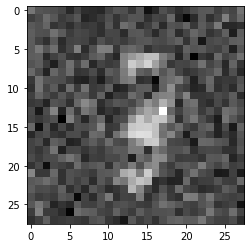

0 177.56662 177.56393 0.002677407


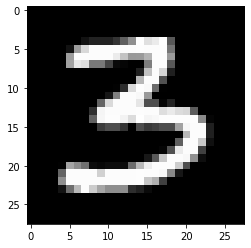

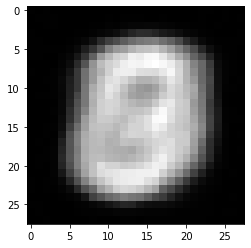

200 50.55513 49.773174 0.7819532


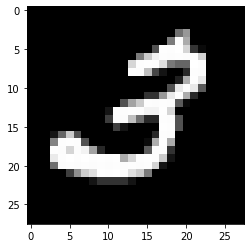

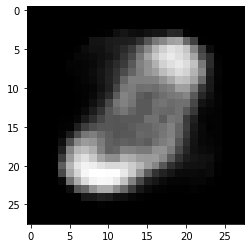

400 39.599327 33.56037 6.0389576


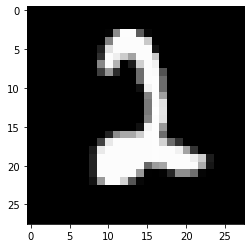

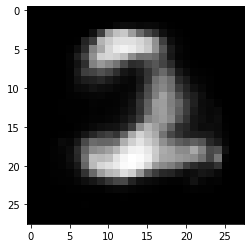

600 35.228935 28.009594 7.2193394


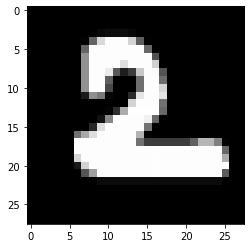

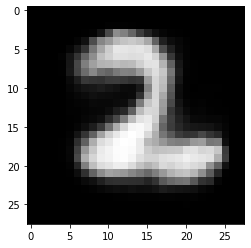

800 34.35337 25.590923 8.762449


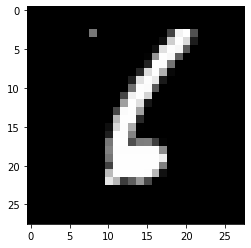

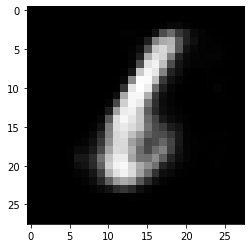

1000 34.441116 25.855211 8.585903


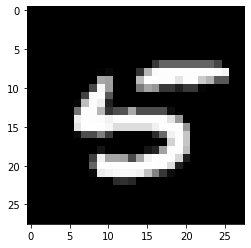

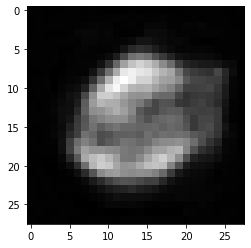

1200 33.00318 24.456587 8.546596


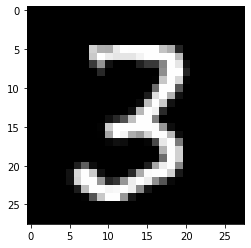

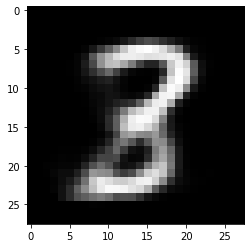

1400 30.676012 21.979376 8.696636


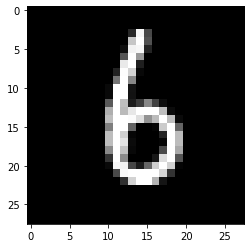

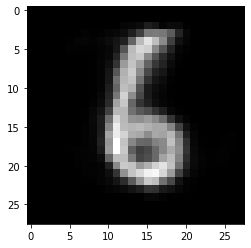

1600 31.604378 22.491386 9.112989


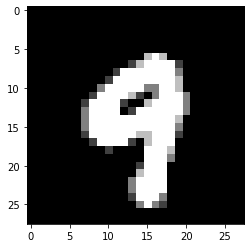

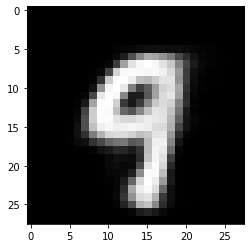

1800 29.754318 20.294285 9.460033


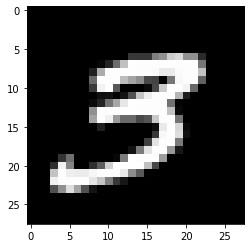

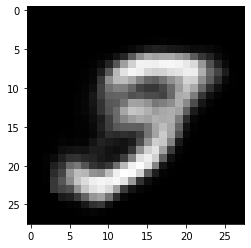

2000 31.080183 21.816332 9.263851


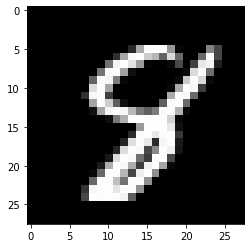

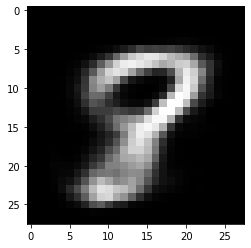

2200 32.578735 22.718987 9.859753


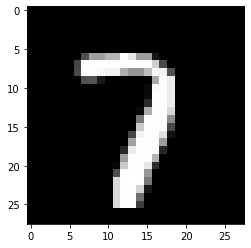

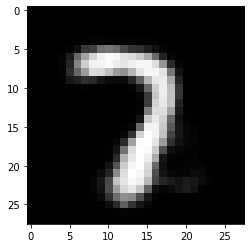

2400 32.923317 23.585735 9.337581


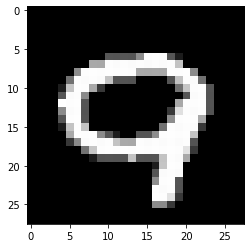

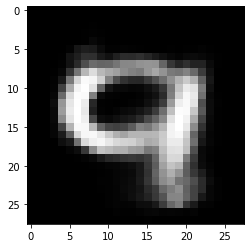

2600 29.666046 20.27077 9.395276


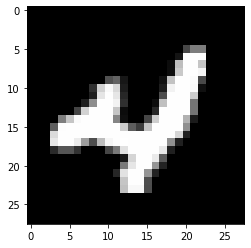

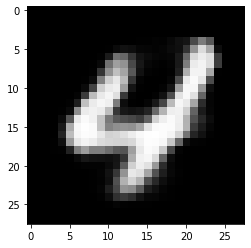

2800 30.242798 20.576027 9.666769


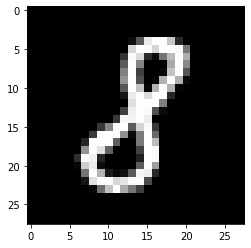

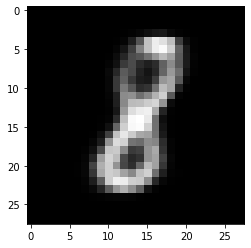

3000 29.088783 19.30066 9.788121


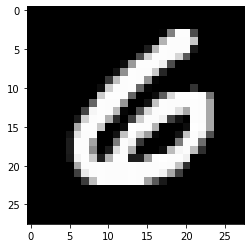

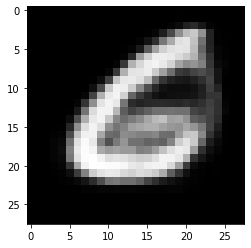

3200 31.05497 21.585056 9.469912


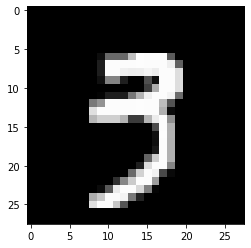

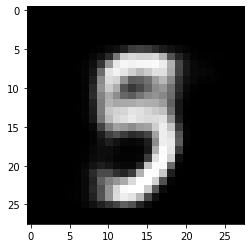

3400 29.3801 18.821697 10.558402


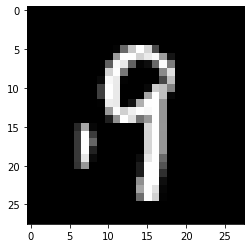

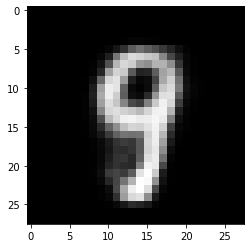

3600 29.176928 19.275333 9.901594


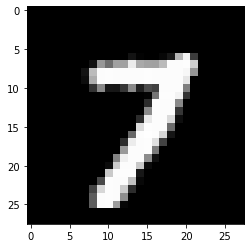

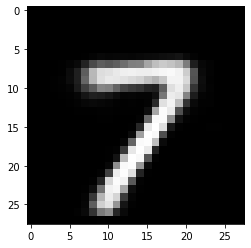

3800 30.180466 20.3974 9.783064


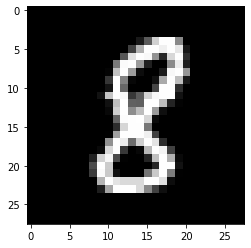

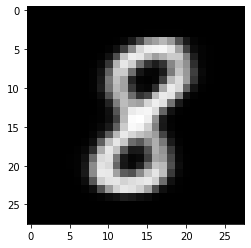

4000 27.917183 18.020752 9.896431


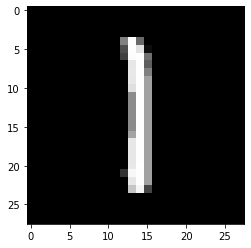

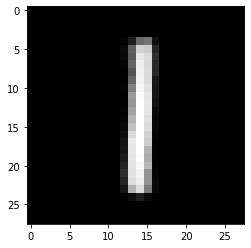

4200 29.088507 19.935333 9.153173


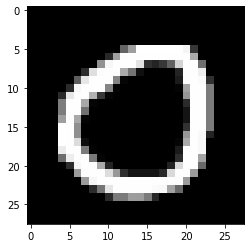

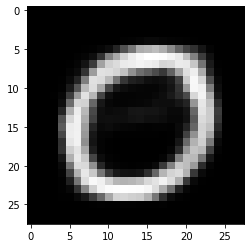

4400 32.258812 22.361336 9.897477


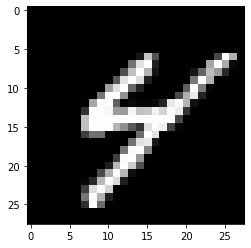

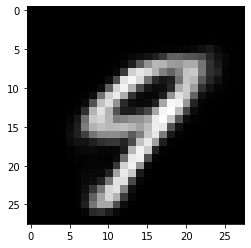

4600 30.491314 20.228893 10.262421


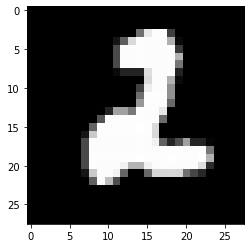

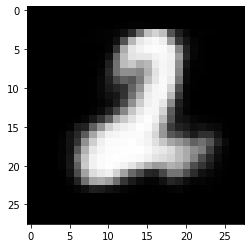

4800 31.075748 21.113518 9.962232


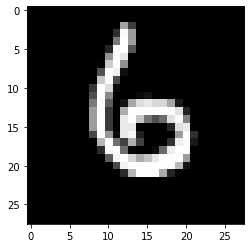

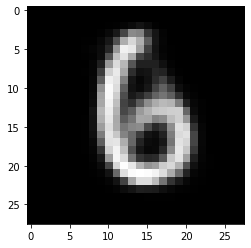

5000 29.104889 18.615276 10.489611


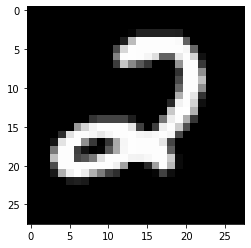

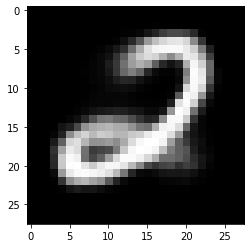

5200 28.818716 18.362686 10.45603


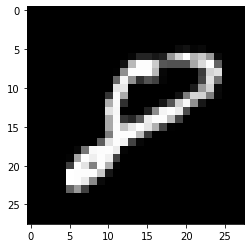

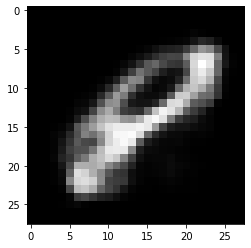

5400 29.040358 19.423738 9.616619


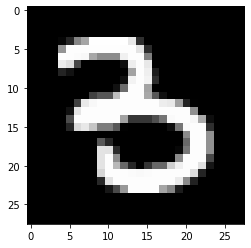

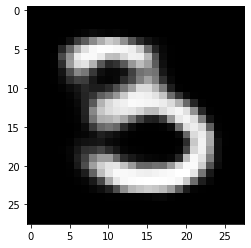

5600 29.589092 18.57897 11.010122


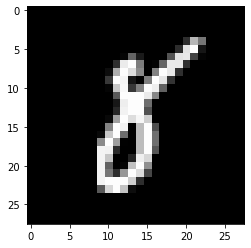

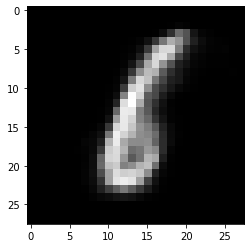

5800 29.812412 19.233128 10.579283


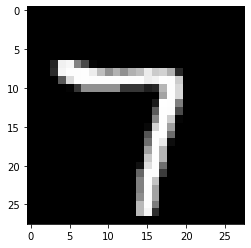

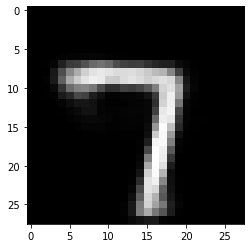

6000 29.755112 20.180447 9.574665


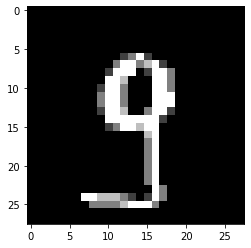

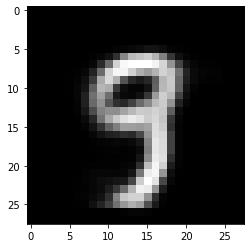

6200 27.778284 17.75486 10.023423


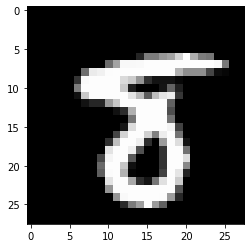

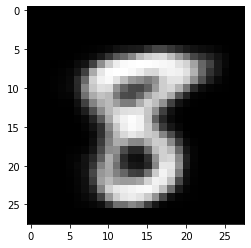

6400 29.089996 18.941286 10.14871


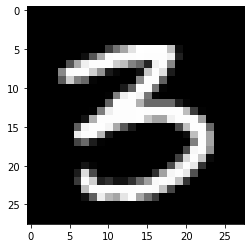

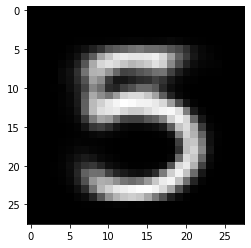

6600 28.3918 18.077602 10.314198


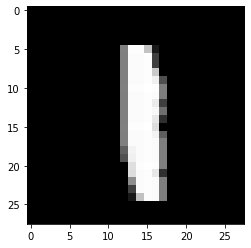

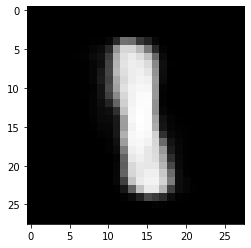

6800 28.244743 18.589558 9.655186


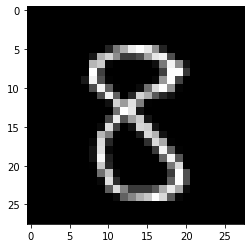

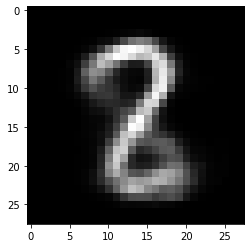

7000 26.829773 17.464935 9.364838


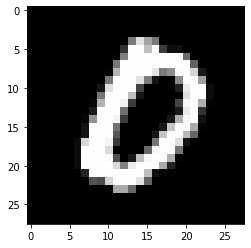

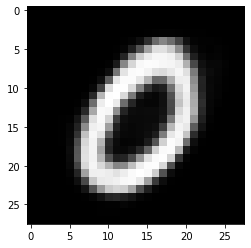

7200 28.123346 18.350357 9.772989


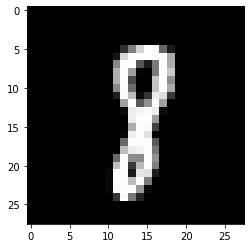

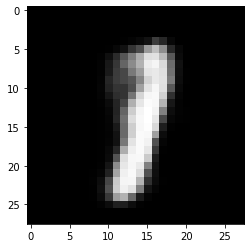

7400 29.429476 19.487028 9.942448


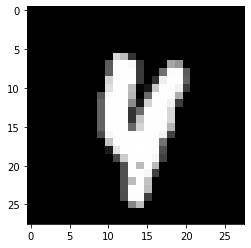

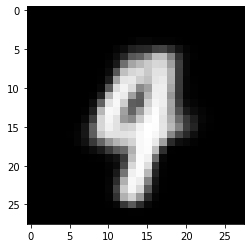

7600 29.145977 18.535913 10.610064


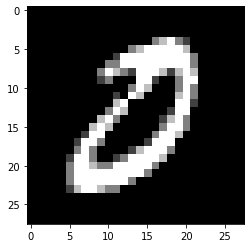

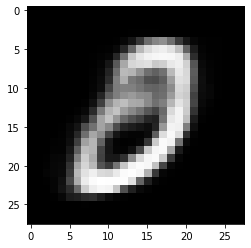

7800 27.73462 17.82531 9.9093075


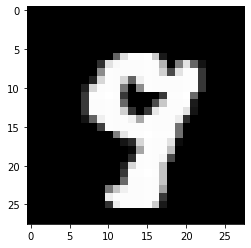

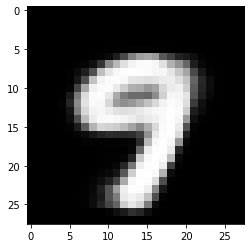

8000 28.879908 18.376364 10.503544


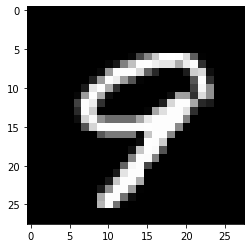

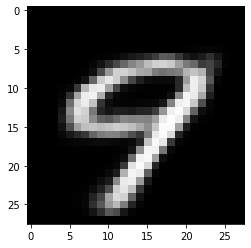

8200 28.25431 18.074076 10.180235


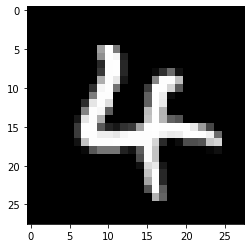

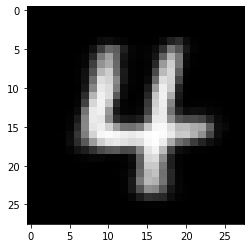

8400 29.99672 19.43805 10.55867


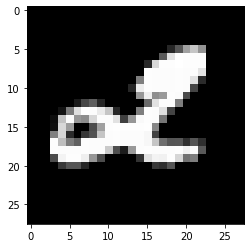

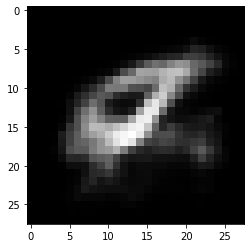

8600 27.823982 17.491745 10.332235


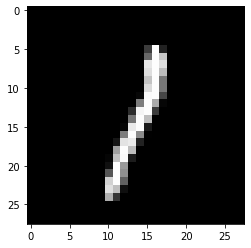

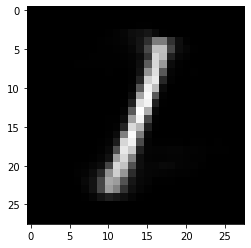

8800 30.578526 20.063776 10.514748


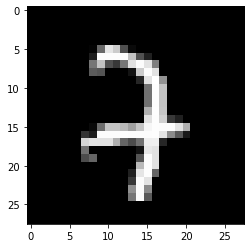

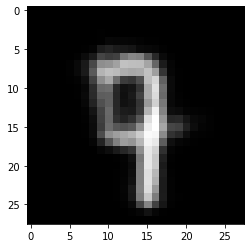

9000 28.841404 18.662434 10.178971


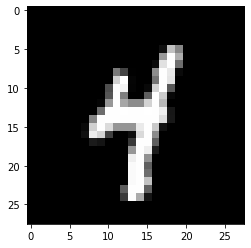

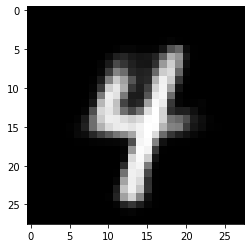

9200 27.28627 17.192883 10.0933895


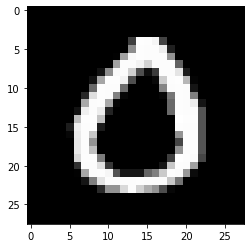

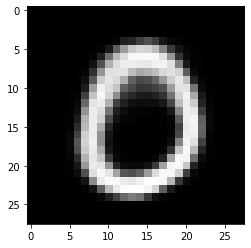

9400 29.014439 18.162634 10.851805


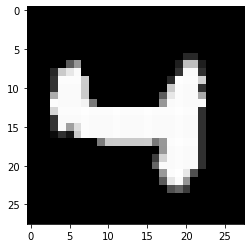

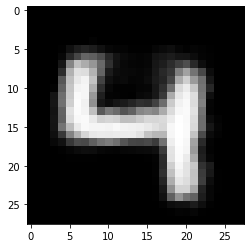

9600 27.459475 17.320995 10.138477


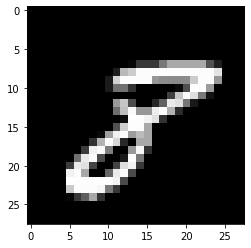

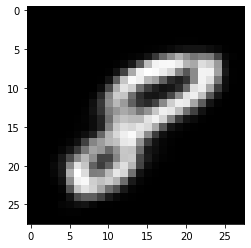

9800 28.588783 18.235857 10.352926


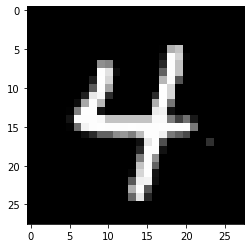

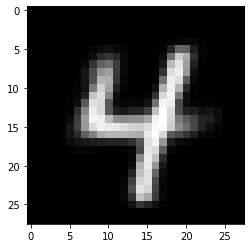

10000 27.339352 16.607964 10.731388


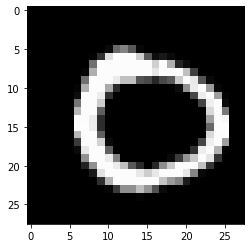

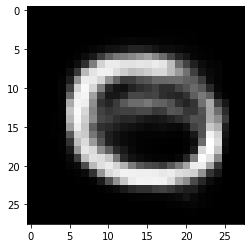

10200 29.313026 18.940636 10.372389


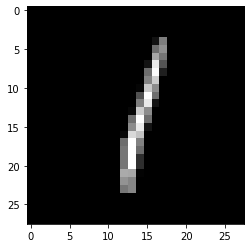

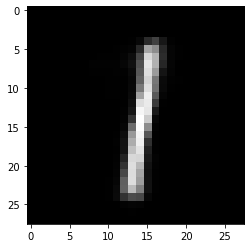

10400 26.910042 17.0186 9.891443


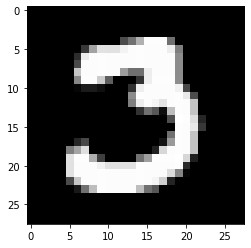

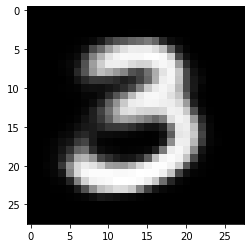

10600 26.915348 16.190758 10.72459


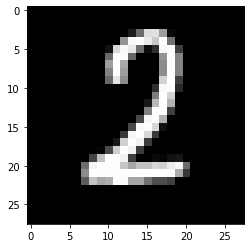

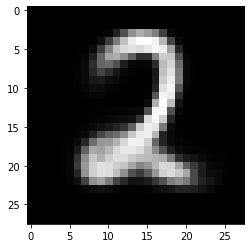

10800 28.66484 18.404152 10.260688


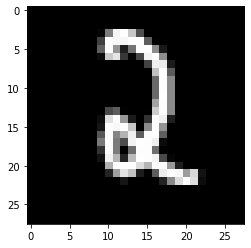

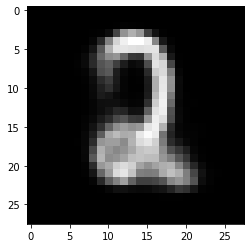

11000 27.084227 16.405867 10.678358


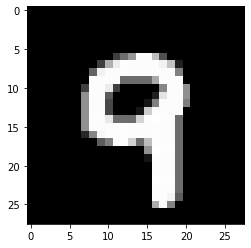

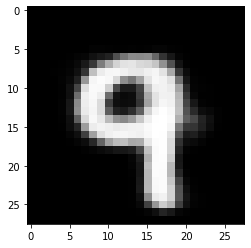

11200 27.200119 16.978874 10.221246


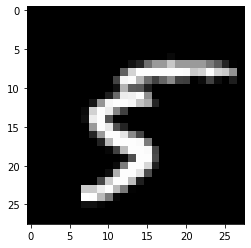

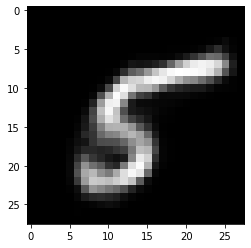

11400 27.80558 17.653276 10.152305


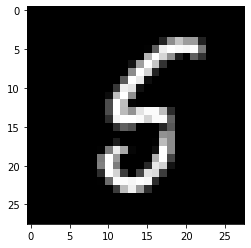

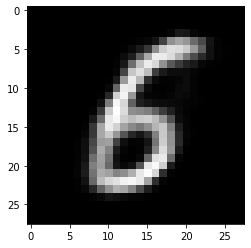

11600 26.315964 15.782839 10.533125


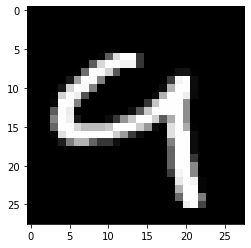

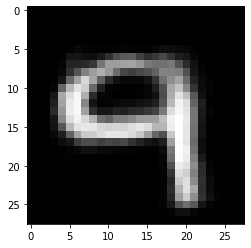

11800 30.1632 19.19402 10.969183


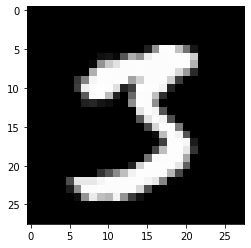

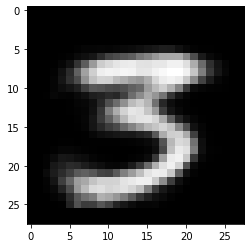

12000 28.71965 18.54255 10.1771


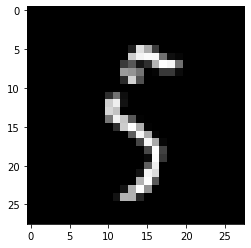

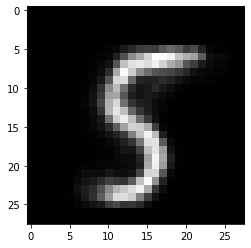

12200 27.356564 17.301214 10.055349


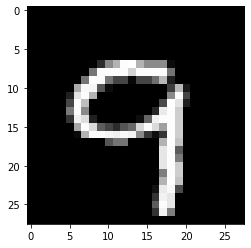

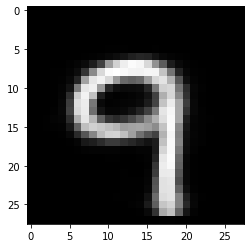

12400 28.809294 18.224535 10.584759


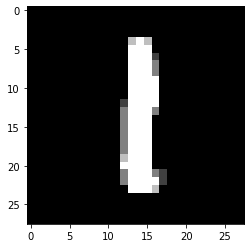

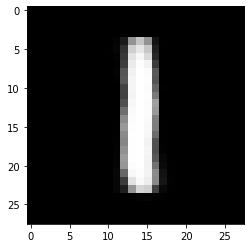

12600 29.068472 18.52459 10.543882


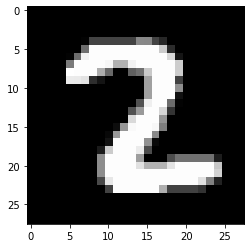

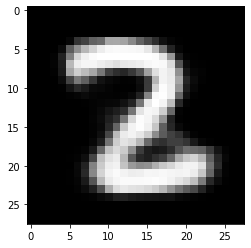

12800 26.035456 16.07776 9.957695


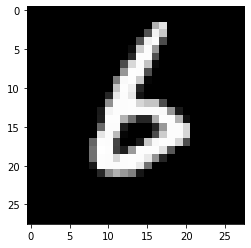

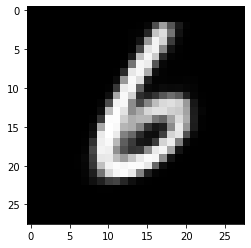

13000 24.843977 14.430239 10.413738


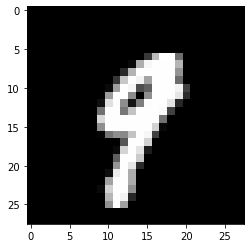

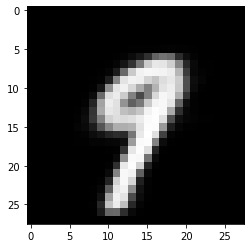

13200 27.270615 16.898727 10.371888


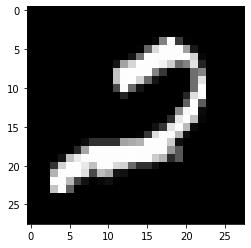

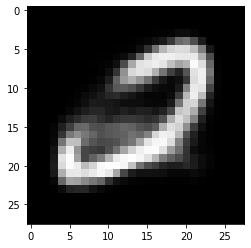

13400 25.423061 15.362948 10.060114


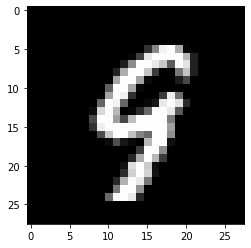

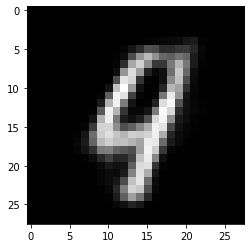

13600 27.36101 16.988178 10.372831


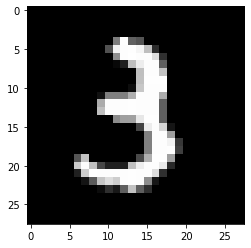

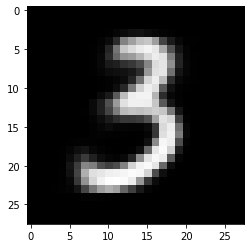

13800 25.17626 15.134048 10.0422125


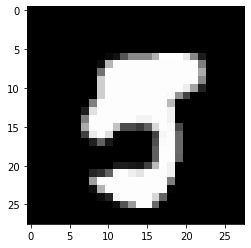

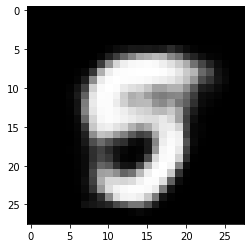

14000 28.851707 17.604597 11.247111


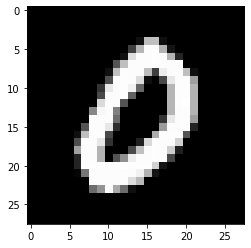

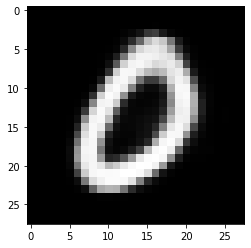

14200 27.618853 17.064526 10.554326


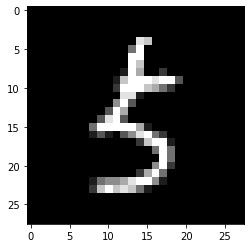

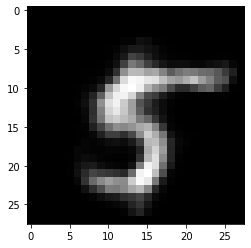

14400 26.261265 16.06713 10.194136


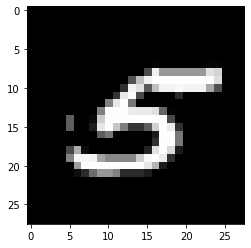

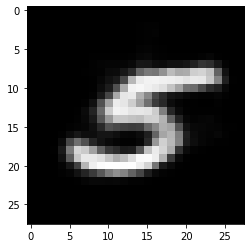

14600 28.596523 17.944965 10.651554


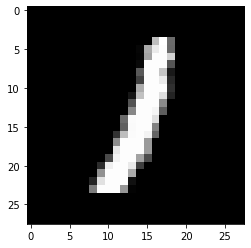

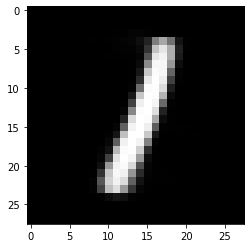

14800 28.214985 17.673168 10.541819


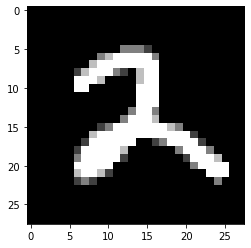

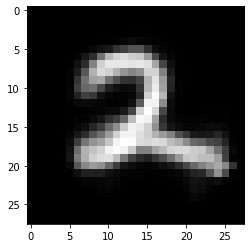

15000 28.046595 16.935902 11.110694


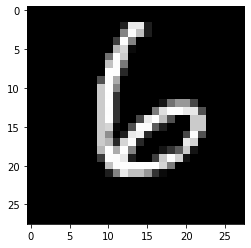

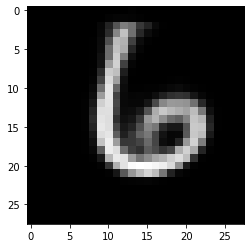

15200 26.658764 16.51676 10.142005


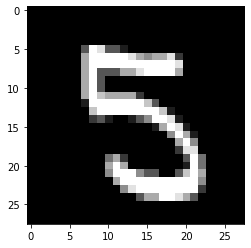

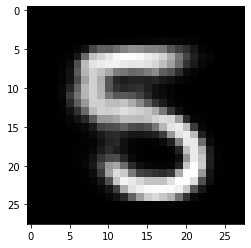

15400 28.27555 18.299942 9.975612


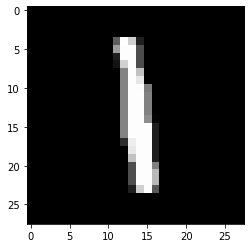

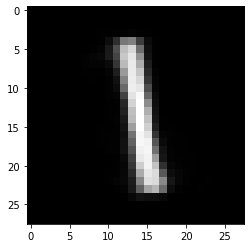

15600 27.023663 17.005869 10.017794


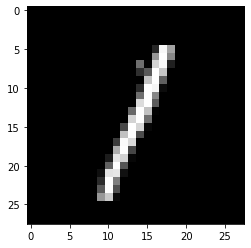

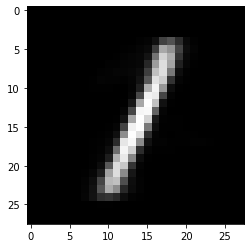

15800 27.644999 16.936077 10.70892


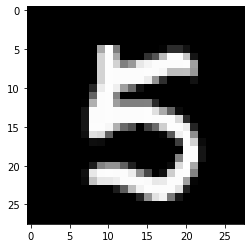

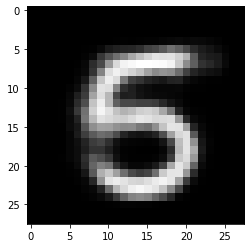

16000 27.719524 16.911259 10.808266


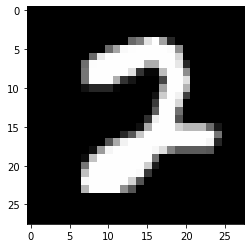

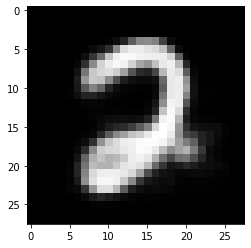

16200 29.592272 19.568802 10.023469


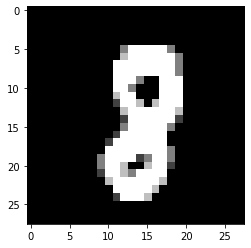

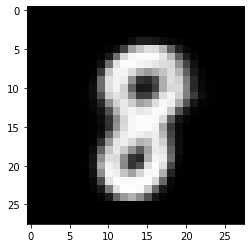

16400 28.421177 17.3979 11.023277


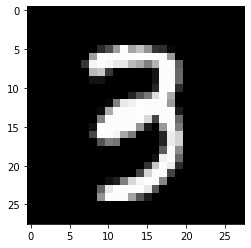

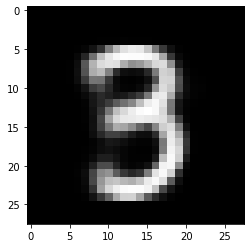

16600 25.610992 15.108696 10.502296


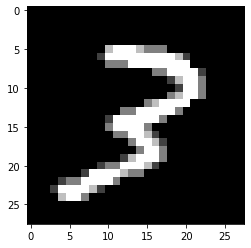

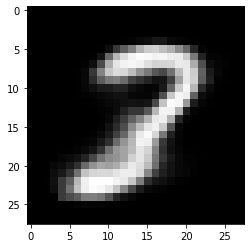

16800 28.322392 18.17209 10.150303


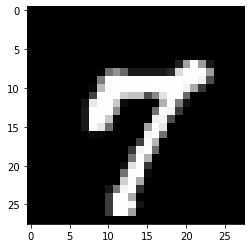

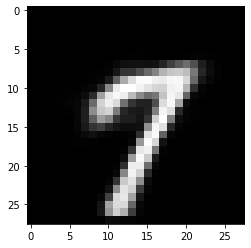

17000 27.199327 16.667988 10.531339


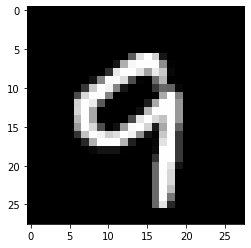

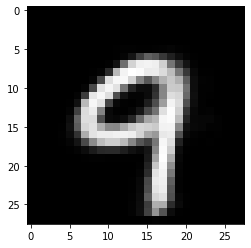

17200 26.130535 15.834696 10.295839


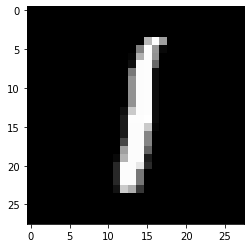

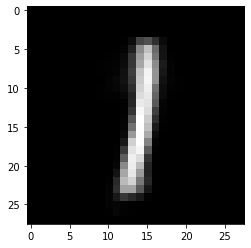

17400 28.328075 17.467215 10.860863


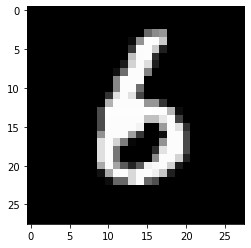

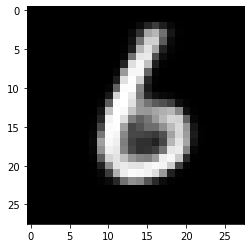

17600 27.72809 16.809975 10.918116


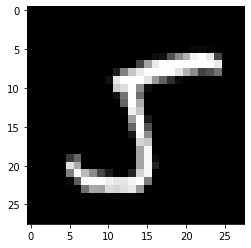

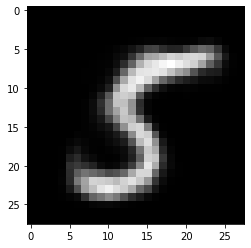

17800 28.540518 17.765682 10.774837


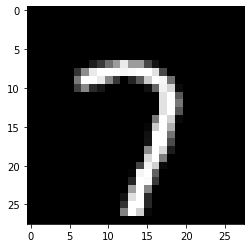

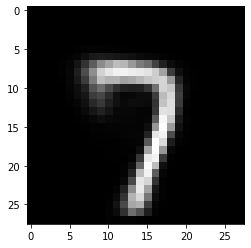

18000 27.621405 16.690975 10.930429


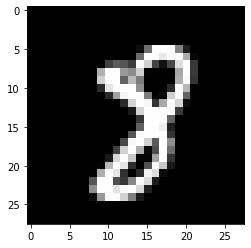

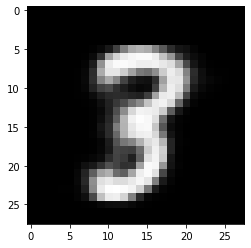

18200 28.595524 18.07302 10.522501


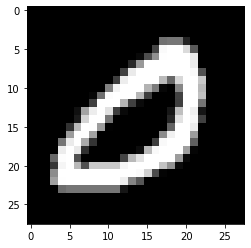

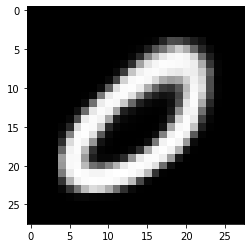

18400 26.862755 15.880293 10.982462


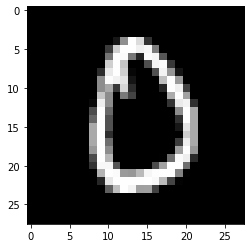

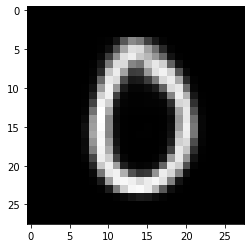

18600 27.13013 15.951214 11.178917


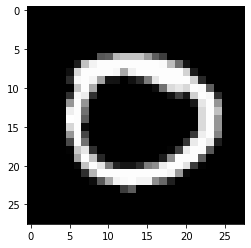

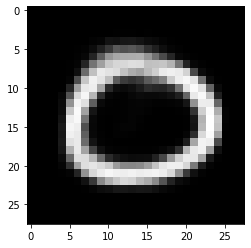

18800 29.1024 18.33247 10.769931


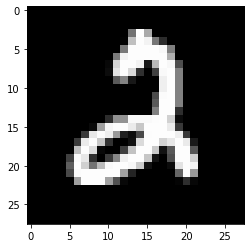

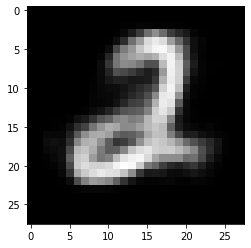

19000 26.7499 15.4608 11.289099


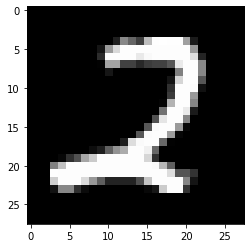

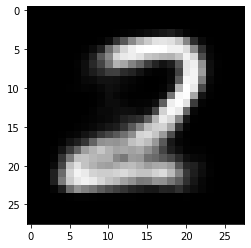

19200 27.883162 16.861353 11.021809


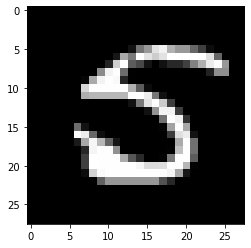

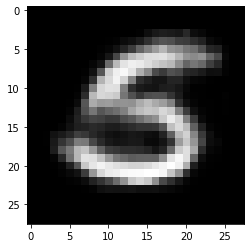

19400 27.642128 16.788458 10.85367


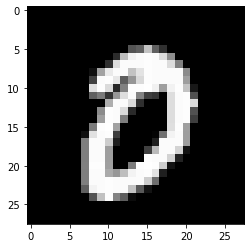

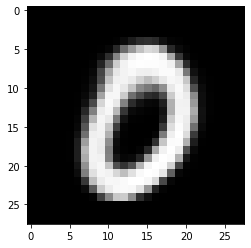

19600 28.187027 17.601913 10.585112


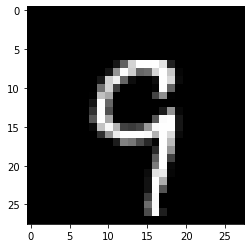

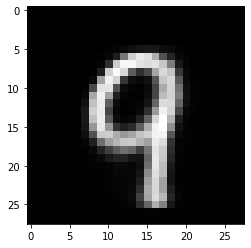

19800 26.957943 16.566095 10.391847


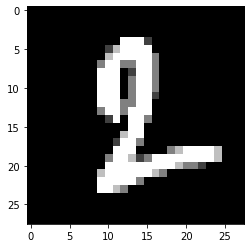

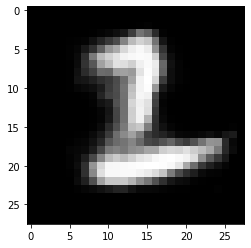

20000 27.7058 17.115082 10.590717


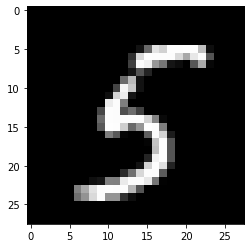

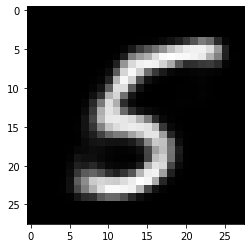

20200 27.330982 16.149014 11.181969


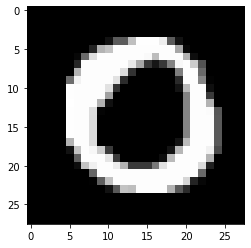

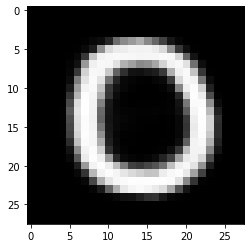

20400 28.302475 17.112938 11.189538


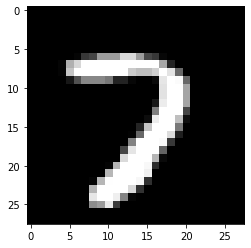

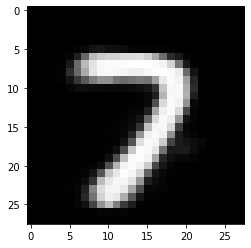

20600 27.988615 17.119785 10.86883


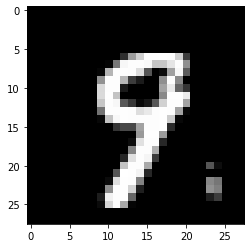

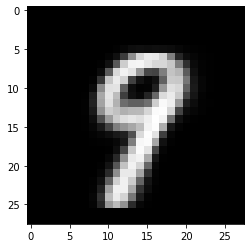

20800 25.726658 15.065821 10.660837


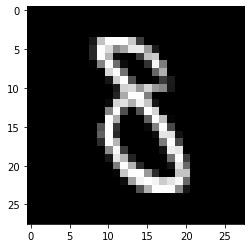

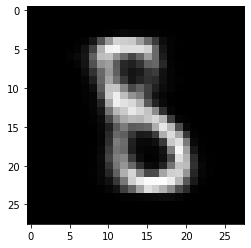

21000 28.847668 18.060156 10.787512


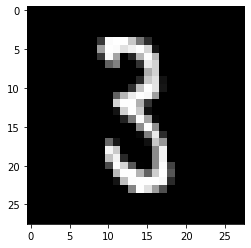

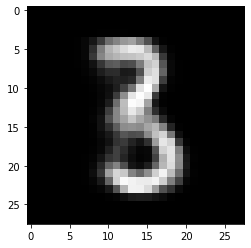

21200 28.355223 16.989605 11.365617


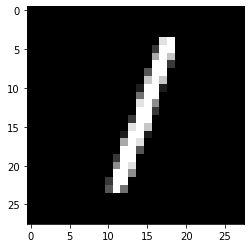

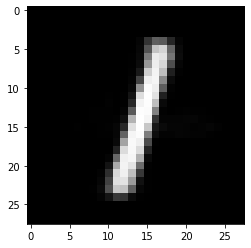

21400 26.985775 16.957115 10.028659


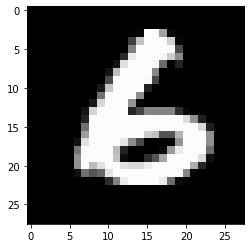

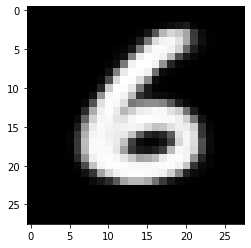

21600 27.761402 17.014984 10.746419


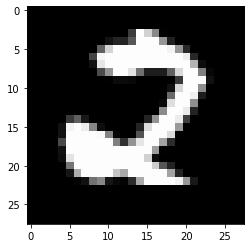

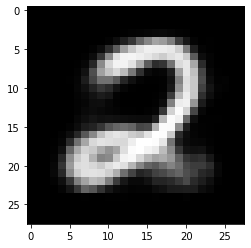

21800 27.927927 16.979923 10.948004


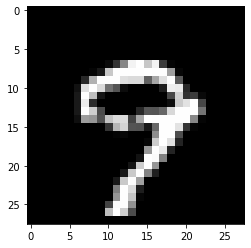

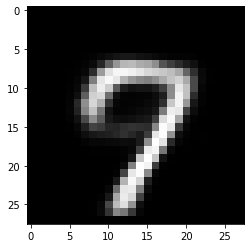

22000 25.285393 15.442784 9.8426075


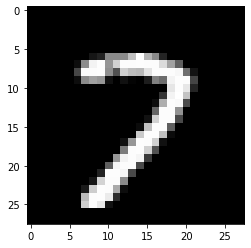

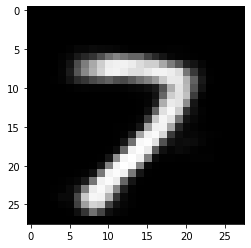

22200 26.87031 16.133783 10.7365265


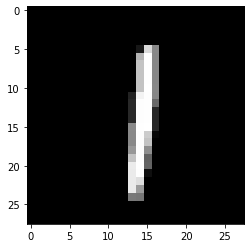

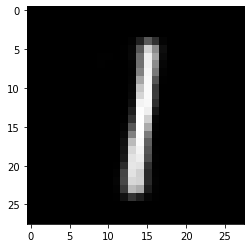

22400 24.03282 13.735406 10.297414


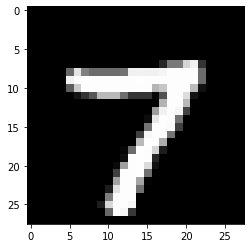

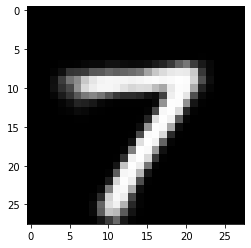

22600 26.819996 16.148195 10.671801


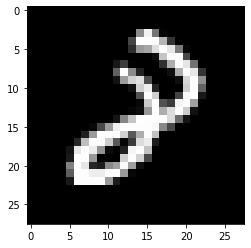

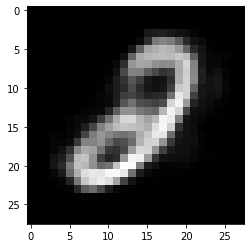

22800 28.559677 17.45225 11.107428


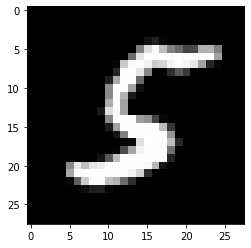

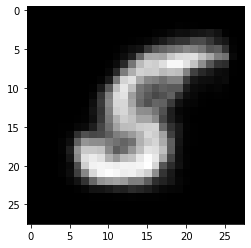

23000 25.84261 15.504911 10.337698


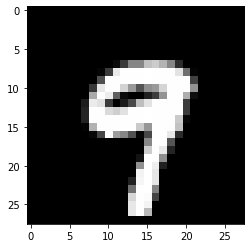

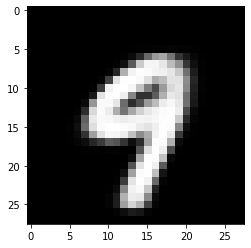

23200 27.768496 17.517185 10.251308


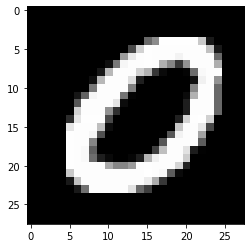

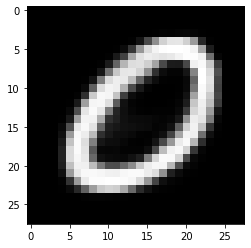

23400 26.845148 16.371075 10.474073


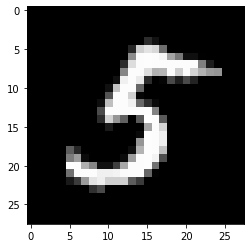

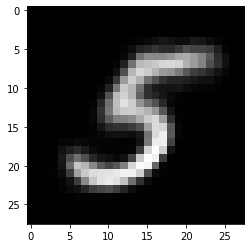

23600 25.445625 15.476385 9.969241


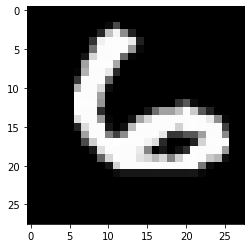

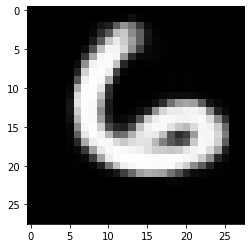

23800 26.872385 16.534668 10.337719


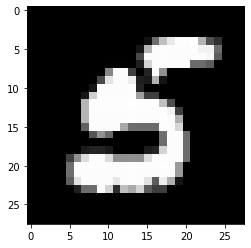

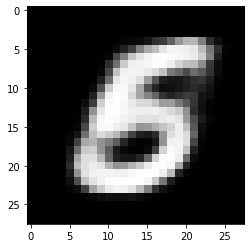

24000 28.793722 18.037237 10.756486


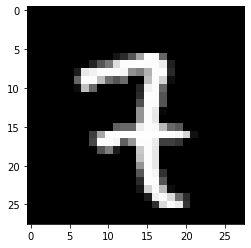

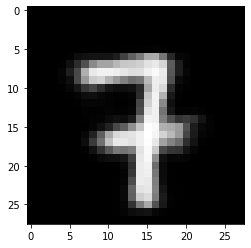

24200 27.838314 17.02481 10.813504


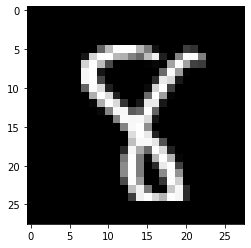

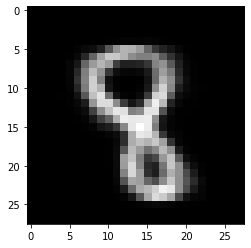

24400 26.836323 16.185373 10.65095


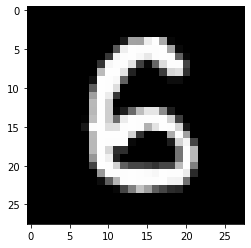

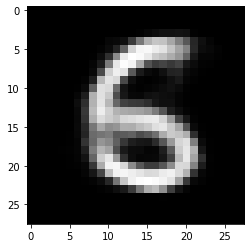

24600 27.160944 16.368114 10.792831


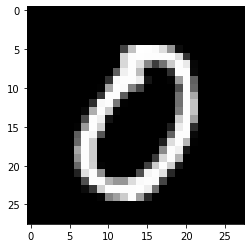

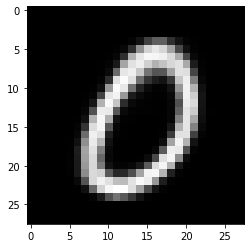

24800 26.036602 15.42567 10.610932


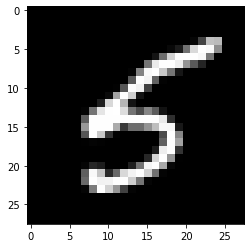

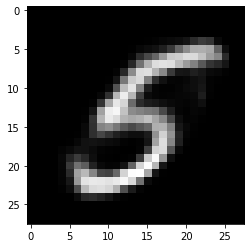

25000 26.835651 15.826895 11.008758


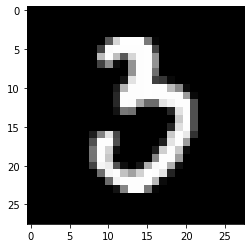

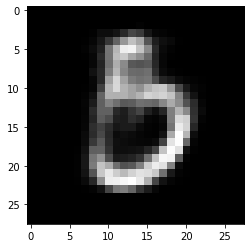

25200 27.17614 16.165556 11.010584


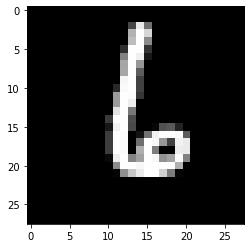

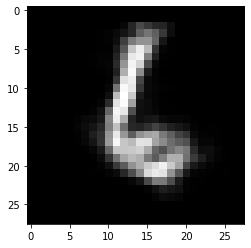

25400 24.839478 14.211887 10.62759


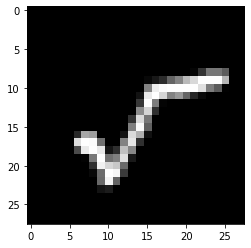

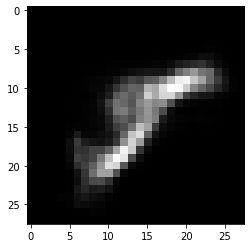

25600 27.101772 15.965192 11.1365795


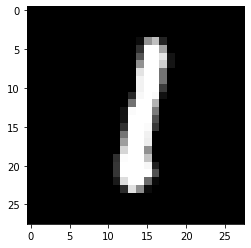

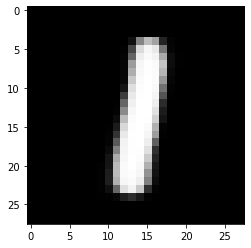

25800 25.942982 14.9871235 10.955858


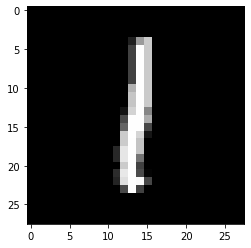

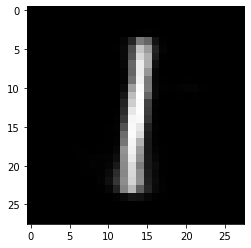

26000 26.6966 16.294392 10.402206


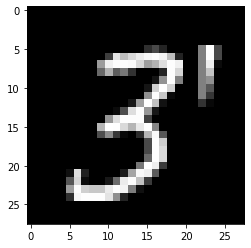

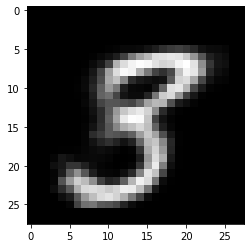

26200 25.565971 15.066887 10.499084


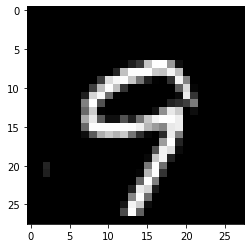

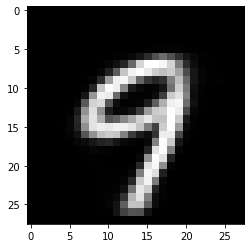

26400 26.605076 16.008854 10.596226


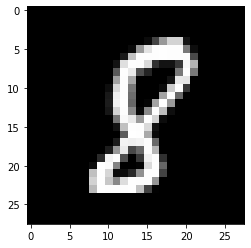

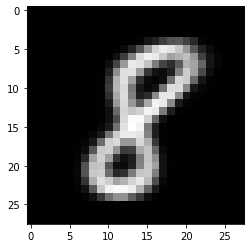

26600 27.788208 16.862553 10.925655


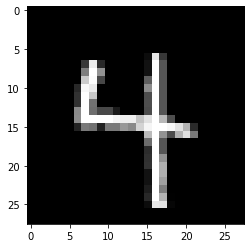

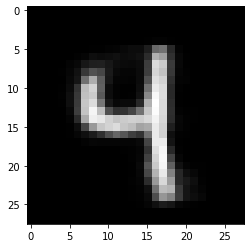

26800 28.20272 17.028736 11.173985


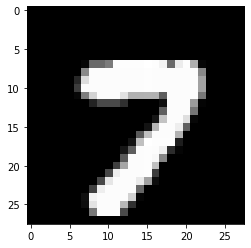

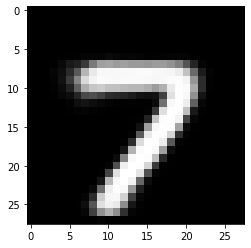

27000 26.169746 15.280772 10.888975


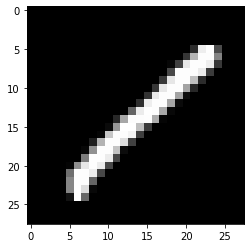

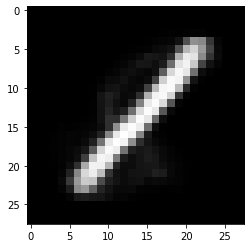

27200 26.804739 16.197641 10.607098


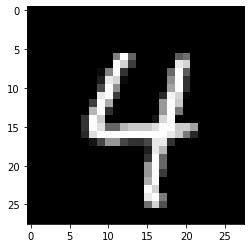

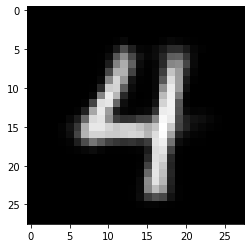

27400 25.37592 14.687242 10.688677


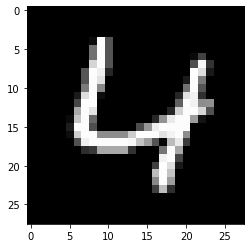

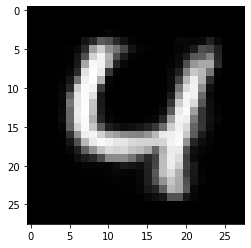

27600 26.787304 16.143318 10.643985


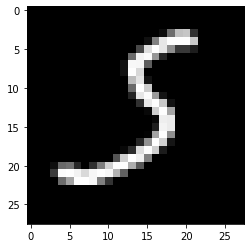

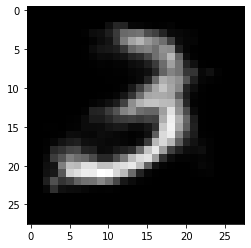

27800 26.868721 16.21062 10.658099


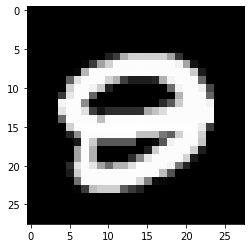

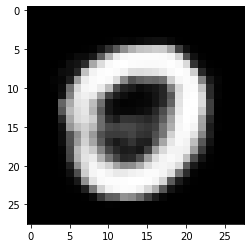

28000 25.875742 15.224327 10.651415


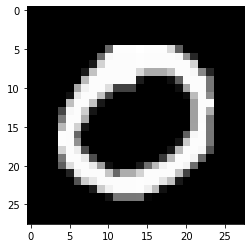

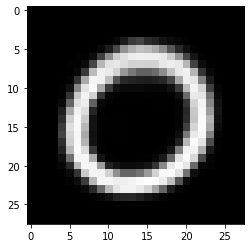

28200 26.664314 15.452687 11.211625


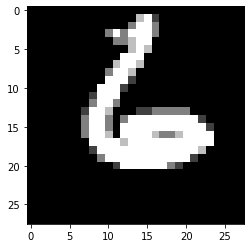

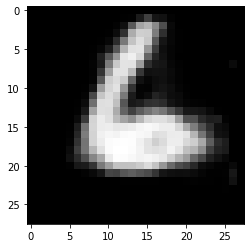

28400 27.721573 17.201092 10.52048


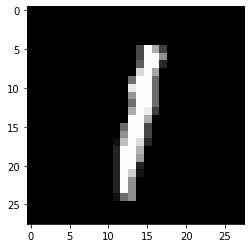

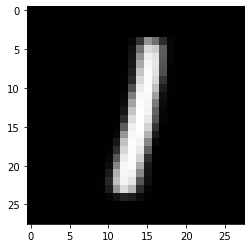

28600 28.69125 17.934797 10.756453


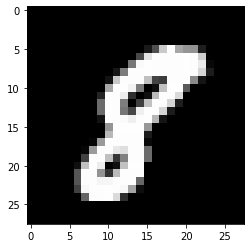

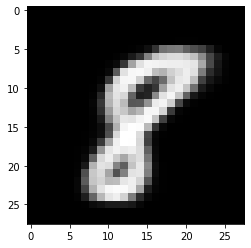

28800 27.750555 16.319729 11.430827


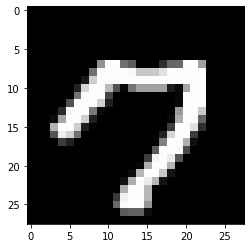

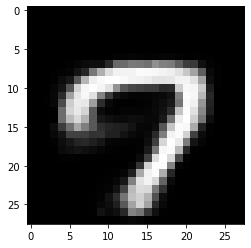

29000 27.944046 16.908098 11.035948


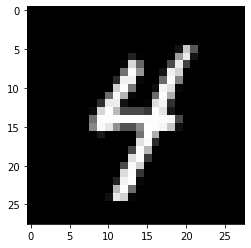

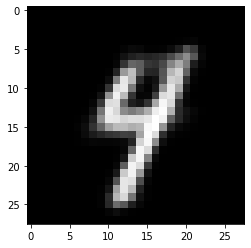

29200 24.593643 14.158299 10.435344


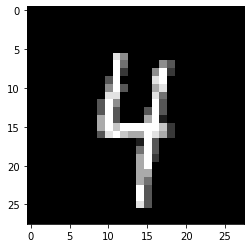

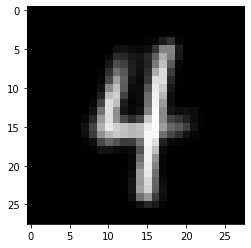

29400 26.077585 15.253594 10.823991


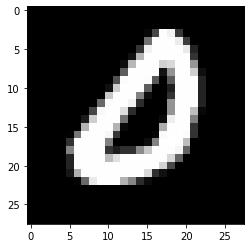

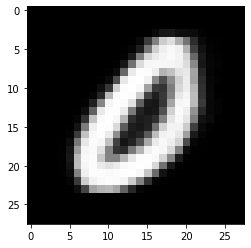

29600 28.18088 16.58329 11.59759


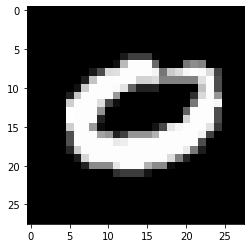

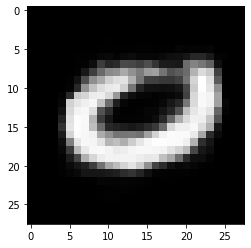

29800 27.75864 16.40416 11.35448


In [ ]:

for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

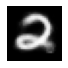

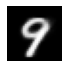

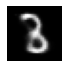

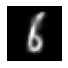

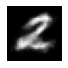

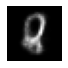

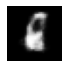

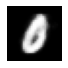

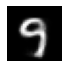

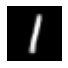

In [ ]:

randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')

# Second Tutorial

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# training
BATCH_SIZE = 100
trainset = datasets.MNIST('./data/', train=True, download=True,
                   transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
# test
testset = datasets.MNIST('./data/', train=False, download=False,
                   transform=transforms.ToTensor())

testloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
def show_images(images):
    images = torchvision.utils.make_grid(images)
    show_image(images[0])

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(images)

NameError: ignored

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_variable_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc2m = nn.Linear(400, latent_variable_dim) # use for mean
        self.fc2s = nn.Linear(400, latent_variable_dim) # use for standard deviation
        
        self.fc3 = nn.Linear(latent_variable_dim, 400)
        self.fc4 = nn.Linear(400, 784)
        
    def reparameterize(self, log_var, mu):
        s = torch.exp(0.5*log_var)
        eps = torch.rand_like(s) # generate a iid standard normal same shape as s
        return eps.mul(s).add_(mu)
        
    def forward(self, input):
        x = input.view(-1, 784)
        x = torch.relu(self.fc1(x))
        log_s = self.fc2s(x)
        m = self.fc2m(x)
        z = self.reparameterize(log_s, m)
        
        x = self.decode(z)
        
        return x, m, log_s
    
    def decode(self, z):
        x = torch.relu(self.fc3(z))
        x = torch.sigmoid(self.fc4(x))
        return x

In [ ]:
def loss(input_image, recon_image, mu, log_var):
    CE = F.binary_cross_entropy(recon_image, input_image.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    
    return KLD + CE

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 0.001
latent_variable_dimension = 2
model = VAE(2).to(device)
train_loss = []
epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

Starting epoch 0
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4


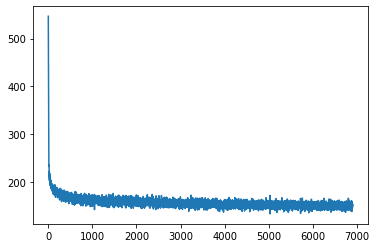

In [ ]:
## train
for epoch in range(epochs):
    print(f"Starting epoch {epoch}")
    for i, data in enumerate(trainloader, 0):
        images, labels = data
        images = images.to(device)
        optimizer.zero_grad()
        recon_image, s, mu = model(images)
        l = loss(images, recon_image, mu, s)
        l.backward()
        train_loss.append(l.item() / len(images))
        optimizer.step()
plt.plot(train_loss)
plt.show()

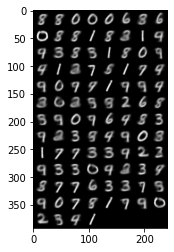

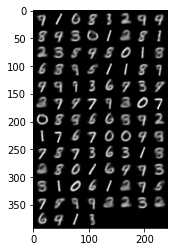

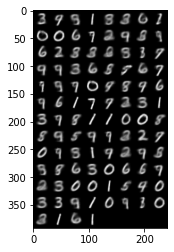

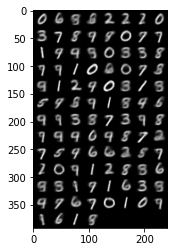

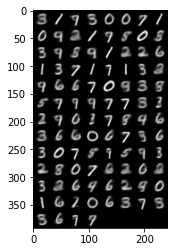

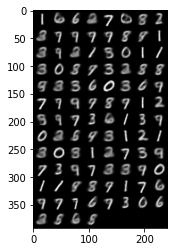

In [ ]:
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        images, labels = data
        images = images.to(device)
        recon_image, s, mu = model(images)
        recon_image_ = recon_image.view(BATCH_SIZE, 1, 28, 28)
        if i % 100 == 0:
            show_images(recon_image_.cpu())

In [ ]:
with torch.no_grad():
    z = [[2,.5], [0,1], [1,1], [-1,-1], [-0.9, -0.9], [-0.5, -0.5]]
    sample_images = model.decode(torch.FloatTensor(z).to(device))
    sample_images_ = sample_images.view(len(z), 1, 28,28)
    print(sample_images_.size())
    show_images(sample_images_.cpu())

NameError: ignored

# With Queensland dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive'

 20190912_111343-01.jpeg
 4.gdoc
'605 Resource.gdoc'
 Abdullah.pdf
 ab-innovates-graduate-student-scholarship.pdf
'Automatic Detection and Tracking of Objects Final Presentation.gslides'
'Automatic Detection and Tracking of Objects.gslides'
'c605 Winter 2020 Tahjid Ashfaque Mostafa.gdoc'
'Camera images mug'
 CelebA
 cmput404lab3h03
'CMPUT 404 Project Marks .gsheet'
'CMPUT 605 Presentation 2.gslides'
'Cmput615 box'
 CMPUT_615_Final_Report.pdf
 CMPUT_615_Final_Report_Tahjid.pdf
'CMPUT 615 Resources.gdoc'
'CMPUT 617 Final.gslides'
'CMPUT 697 Assignment 1.gdoc'
'CMPUT 697 Course Project.gslides'
'Colab Notebooks'
 Collection
'Copy of CMPUT 174 Lab D24- List.gsheet'
'Copy of Copy of OG1204-SNFHM2.part1.rar'
'Copy of Copy of OG1204-SNFHM2.part2.rar'
'Copy of Copy of OG1204-SNFHM2.part3.rar'
'Copy of Copy of OG1204-SNFHM2.part4.rar'
'Copy of Copy of OG1204-SNFHM2.part5.rar'
'Copy of Spreadsheet for Labs in 174.gsheet'
 data
 data_object_label_2.zip
 Dataset
 Exercise2-TahjidAshfaqueMostafa.gd

In [ ]:
!unzip '/content/drive/My Drive/uqvitalsignsdata_case01to32.zip' -d '/content/drive/My Drive/QueenslandDataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02140.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02150.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02160.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02170.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02180.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_010s_02190.png  
  inflating: /content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/case28/waveformplots/uq_vsd_case28_waveformplots_

In [ ]:
import os

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#load_data, write a custom data loader later

def loadData(root="/content/drive/My Drive/QueenslandDataset/uqvitalsignsdata/"):
    for subdir in os.listdir(root):
        print(subdir)
loadData()

case01
case02
case03
case04
case05
case06
case07
case08
case09
case10
case11
case12
case13
case14
case15
case16
case17
case18
case19
case20
case21
case22
case23
case24
case25
case26
case27
case28
case29
case30
case31
case32
